In [17]:
import pandas as pd
import numpy as np
from factor_analyzer.utils import covariance_to_correlation
import graphviz
import semopy
import matplotlib.pyplot as plt
import seaborn as sns



In [18]:
df_all = pd.read_csv('all.csv')

In [19]:
df_all

,Unnamed: 0,x,d1,d2,d3,d4,d5,w1,w2,w3,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
0,0,1,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,...,29,21,10,6,3,1.6111,3.1556,3.7000,3.6667,3.5000
1,1,2,11.0338,6.1047,7.2883,7.54295,9.90751,25.40064,16.89495,16.52988,...,14,8,12,21,3,3.0000,3.0000,3.0000,3.0000,3.0000
2,2,3,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,...,18,16,18,15,4,2.4667,2.4667,2.7333,2.6222,3.4222
3,3,4,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,...,28,16,17,11,4,2.2778,3.3778,3.9000,3.2889,3.7889
4,4,5,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,...,23,24,24,23,5,1.4444,4.4111,4.5778,4.1778,4.6889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,799,800,7.5822,0.1201,6.5722,3.32963,4.75933,22.04394,17.21857,11.89841,...,33,19,18,11,4,2.0000,4.3000,4.5000,4.5000,4.5000
800,800,801,5.6149,-0.7314,1.6795,3.74132,5.60217,29.58012,15.73032,14.89273,...,33,18,24,10,4,2.4667,4.0556,4.2778,3.7778,4.0333
801,801,802,6.0455,2.0958,3.8635,4.97563,5.69270,28.18144,19.74430,19.20815,...,14,16,11,21,2,3.3778,3.2333,3.5333,3.5333,3.5333
802,802,803,8.6738,-0.4216,1.4291,4.27503,5.49286,31.06191,21.50243,19.40287,...,28,26,17,6,4,1.8444,4.6111,4.2444,4.0222,4.3333


In [20]:
df_all.columns

Index(['Unnamed: 0', 'x', 'd1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4',
       'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p', 'none_s', 'image_s',
       'announce_s', 'image_sound_s', 'image_announce_s'],
      dtype='object')

In [21]:
df_all = df_all[['x', 'd1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4',
       'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']]

In [22]:
# df_all_s = df_all[['提示なし', '画像のみ', '音声のみ', '画像+報知音', '画像+音声']]

df_all_s = pd.read_csv('主観評価設問状態_origin_mean_drop0808.csv')

new_column_names = {'0': 'none_s','1': 'image_s', '2': 'announce_s','3': 'image_sound_s', '4': 'image_announce_s'}

df_all_s = df_all_s.rename(columns=new_column_names)
df_all_s[6:13]


,Unnamed: 0,none_s,image_s,announce_s,image_sound_s,image_announce_s
6,6,3.00,3.00,3.0,3.00,3.00
7,7,3.20,3.05,3.2,3.05,3.15
8,8,2.75,3.00,2.9,3.00,3.40
9,9,3.00,2.70,3.1,2.60,3.20
10,10,2.00,4.60,4.5,4.05,4.35
11,11,2.60,3.50,3.9,3.05,3.80
12,12,2.40,3.50,3.4,3.50,3.35


In [23]:
# #カラム名が'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'のものを抽出
# df_all_s = df_all[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']]
# df_all_s

In [24]:
# 各行の最大値を求める
df_all_s['max_value'] = df_all_s.max(axis=1)
# 各行で最大値の数をカウントする
df_all_s['max_count'] = df_all_s.apply(lambda row: list(row).count(row['max_value']) - 1, axis=1)
df_all_s

,Unnamed: 0,none_s,image_s,announce_s,image_sound_s,image_announce_s,max_value,max_count
0,0,1.75,3.10,3.55,3.60,3.55,3.60,1
1,1,3.00,3.00,3.00,3.00,3.00,3.00,5
2,2,2.40,2.40,2.70,2.60,3.50,3.50,1
3,3,2.15,3.40,3.85,3.30,3.55,3.85,1
4,4,1.80,4.05,4.20,3.80,4.70,4.70,1
...,...,...,...,...,...,...,...,...
799,799,2.10,4.15,4.35,4.35,4.35,799.00,1
800,800,2.40,4.05,4.05,3.70,3.75,800.00,1
801,801,3.40,3.45,3.60,3.60,3.60,801.00,1
802,802,2.20,4.25,4.20,3.90,4.30,802.00,1


In [25]:
# # 各行の最大値を求める
# df_all_s['max_value'] = df_all_s.max(axis=1)

# # 各行で最大値の数をカウントする
# df_all_s['max_count'] = df_all_s.apply(lambda row: list(row).count(row['max_value']), axis=1)

# 同点がない行のみを抽出する
df_all_s_drop = df_all_s[df_all_s['max_count'] == 1]
df_all_s_drop.head(30
                   )

,Unnamed: 0,none_s,image_s,announce_s,image_sound_s,image_announce_s,max_value,max_count
0,0,1.75,3.10,3.55,3.60,3.55,3.60,1
2,2,2.40,2.40,2.70,2.60,3.50,3.50,1
3,3,2.15,3.40,3.85,3.30,3.55,3.85,1
4,4,1.80,4.05,4.20,3.80,4.70,4.70,1
5,5,2.50,3.45,3.20,2.65,3.70,5.00,1
6,6,3.00,3.00,3.00,3.00,3.00,6.00,1
7,7,3.20,3.05,3.20,3.05,3.15,7.00,1
8,8,2.75,3.00,2.90,3.00,3.40,8.00,1
9,9,3.00,2.70,3.10,2.60,3.20,9.00,1
10,10,2.00,4.60,4.50,4.05,4.35,10.00,1


In [26]:
df_all_s

,Unnamed: 0,none_s,image_s,announce_s,image_sound_s,image_announce_s,max_value,max_count
0,0,1.75,3.10,3.55,3.60,3.55,3.60,1
1,1,3.00,3.00,3.00,3.00,3.00,3.00,5
2,2,2.40,2.40,2.70,2.60,3.50,3.50,1
3,3,2.15,3.40,3.85,3.30,3.55,3.85,1
4,4,1.80,4.05,4.20,3.80,4.70,4.70,1
...,...,...,...,...,...,...,...,...
799,799,2.10,4.15,4.35,4.35,4.35,799.00,1
800,800,2.40,4.05,4.05,3.70,3.75,800.00,1
801,801,3.40,3.45,3.60,3.60,3.60,801.00,1
802,802,2.20,4.25,4.20,3.90,4.30,802.00,1


In [27]:
# # 各行ごとに等しい組み合わせを探す関数
# def find_equal_combinations(row):
#     values = row.values
#     columns = row.index
#     equal_combinations = []
#     # Broadcastingを利用して比較行列を作成
#     comparison_matrix = values[:, None] == values
#     # 対角成分を無視して、Trueのインデックスを取得
#     indices = np.where(np.triu(comparison_matrix, 1))
#     for i, j in zip(*indices):
#         equal_combinations.append((columns[i], columns[j]))
#     return equal_combinations

# df = df_all_s
# # 各IDごとに等しい組み合わせを確認
# df['equal_combinations'] = df.apply(find_equal_combinations, axis=1)

# # 結果を表示
# df[['equal_combinations']]

In [28]:
# #df[['equal_combinations']]とdf_allを結合
# df_all_equal = pd.concat([df_all, df[['equal_combinations']]], axis=1)
# df_all_equal

In [29]:
# #df[['equal_combinations']]の値がある行を削除
# df_all_s_drop = df_all_s.drop(index=df[df['equal_combinations'].apply(len) > 0].index)
# df_all_s_drop = df_all_s_drop[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']]
# #df_all_s_dropの行数を確認
# print(df_all_s_drop.shape)
# df_all_s_drop

In [30]:
#df_all_s_drop
# #'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の中で値が一番大きいものを抽出
df_all_s_drop_max = df_all_s_drop.idxmax(axis=1)
# #df_all_s_drop_maxの中の値をそれぞれカウント
df_all_s_drop_max.value_counts()


Unnamed: 0          799
image_announce_s      2
image_sound_s         1
announce_s            1
Name: count, dtype: int64

<Axes: >

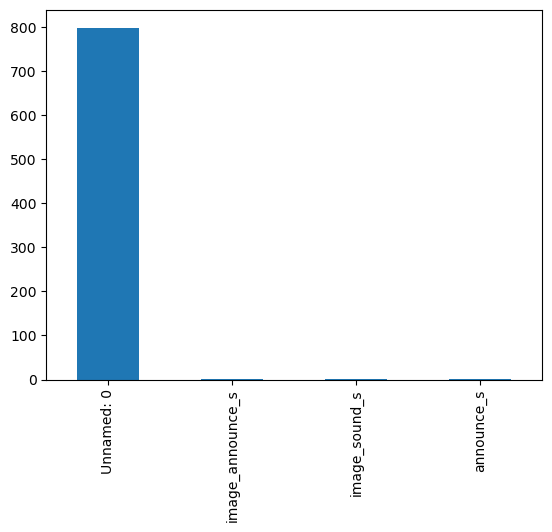

In [31]:
#'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の分布をグラフ表示（棒グラフ）縦軸がカウント数
df_all_s_drop_max.value_counts().plot(kind='bar')

In [33]:
#df_all_equal
#df[['equal_combinations']]の値がある行を削除
df_all_drop = df_all.drop(index=df_all[df_all_s['max_count'] != 1].index)
df_all_drop = df_all_drop[['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4',
       'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']]
#df_all_s_dropの行数を確認
print(df_all_drop.shape)
df_all_drop

(803, 17)


,d1,d2,d3,d4,d5,w1,w2,w3,w4,w5,c1,c2,c3,c4,c5,c6,p
0,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,21.00362,14.88221,20,30,29,21,10,6,3
2,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,20.50303,14.87523,21,19,18,16,18,15,4
3,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,17.58007,11.67031,21,31,28,16,17,11,4
4,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,25.27235,19.50599,28,27,23,24,24,23,5
5,4.9113,1.4880,3.0357,4.70687,6.26354,26.34567,23.30003,23.58674,17.89807,9.89196,25,27,16,11,22,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,7.5822,0.1201,6.5722,3.32963,4.75933,22.04394,17.21857,11.89841,14.83118,10.16673,22,27,33,19,18,11,4
800,5.6149,-0.7314,1.6795,3.74132,5.60217,29.58012,15.73032,14.89273,16.04473,10.39065,18,20,33,18,24,10,4
801,6.0455,2.0958,3.8635,4.97563,5.69270,28.18144,19.74430,19.20815,16.45026,12.30557,21,30,14,16,11,21,2
802,8.6738,-0.4216,1.4291,4.27503,5.49286,31.06191,21.50243,19.40287,18.43385,14.97270,15,24,28,26,17,6,4


In [34]:
#df_all_dropについて，'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の中で値が一番大きいものを抽出
df_all_drop_max = df_all_drop[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']].idxmax(axis=1)
#df_all_drop_maxのカラムを追加
df_all_drop['max'] = df_all_drop_max
#df_all_maxの値ごとにクラス分け
df_all_drop['max1'] = df_all_drop['max'].map({'none_s': 0, 'image_s': 1, 'announce_s': 2, 'image_sound_s': 3, 'image_announce_s': 4})
#df_all_dropの行数を確認
df_all_drop

KeyError: "None of [Index(['none_s', 'image_s', 'announce_s', 'image_sound_s', 'image_announce_s'], dtype='object')] are in the [columns]"

In [16]:
#各クラスごとに'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の値の平均値を計算
df_all_drop_g_max_mean = df_all_drop.groupby('max').mean()
df_all_drop_g_max_mean

,d1,d2,d3,d4,d5,w1,w2,w3,w4,w5,...,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s,max1
max,,,,,,,,,,,,,,,,,,,,,
announce_s,6.270105,0.210965,4.388315,3.679060,5.685100,27.540742,18.744633,15.885963,16.599749,11.417230,...,21.153465,17.599010,12.579208,4.034653,2.381686,3.411384,4.014300,3.308524,3.725026,2.0
image_announce_s,6.156473,0.372582,4.335500,3.630876,5.522726,27.885527,19.116674,16.400021,16.938778,11.947255,...,21.546125,17.239852,13.623616,3.955720,2.387828,3.354449,3.539197,3.291841,3.915537,4.0
image_s,6.503689,0.645548,4.690821,3.684003,5.826028,27.441579,18.426510,15.997046,16.664799,11.558962,...,21.600000,16.700000,13.455556,4.000000,2.550618,3.922096,3.498277,3.613079,3.511356,1.0
image_sound_s,5.937888,0.736550,4.536592,3.721088,5.757237,26.534123,18.025829,15.946523,16.183579,11.492361,...,21.712963,17.870370,13.157407,3.629630,2.429633,3.472638,3.442801,3.835905,3.480660,3.0
none_s,6.050838,0.953369,4.196077,4.224525,5.598627,26.589081,17.682276,16.268788,15.936682,11.223078,...,19.846154,20.615385,17.769231,3.846154,3.163246,2.809385,2.800015,2.810262,2.886323,0.0


In [17]:
#各クラスごとに主観評価値の平均値を算出
df_all_drop_g_max_mean_max_s = df_all_drop_g_max_mean[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']]
df_all_drop_g_max_mean_max_s.max(axis=1)

max
announce_s          4.014300
image_announce_s    3.915537
image_s             3.922096
image_sound_s       3.835905
none_s              3.163246
dtype: float64

In [18]:
#excelファイルに書き出し
df_all_drop_exp = df_all_drop.drop(columns=['max', 'max1'])
df_all_drop_exp
df_all_drop_exp.to_excel('all_drop_exp.xlsx')

In [19]:
#csvファイルに書き出し
df_all_drop_exp.to_csv('all_drop_exp.csv')